<a href="https://colab.research.google.com/github/ashfaknawshad/ml-roadmap/blob/main/03_ml_basics/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Step 1 - Import Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

###Step 2 - Load Dataset

In [2]:
# We'll use the Iris dataset for simplicity
from sklearn.datasets import load_iris

data = load_iris()
X = data.data                  # Features (numeric measurements)
y = data.target                # Labels (species)
feature_names = data.feature_names
target_names = data.target_names

###Step 3 - Split Data


In [3]:
# Split into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


###Step 4 - Train Decision Tree

In [4]:
# Initialize the model
clf = DecisionTreeClassifier(
    criterion='gini',   # How to measure the quality of a split ('gini' or 'entropy')
    max_depth=3,        # Limits the depth to avoid overfitting
    random_state=42
)

# Fit the model on training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

###Step 5 - Evaluate the model

In [5]:
# Make predictions
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


###Step 6 - Visualize the Decision Tree

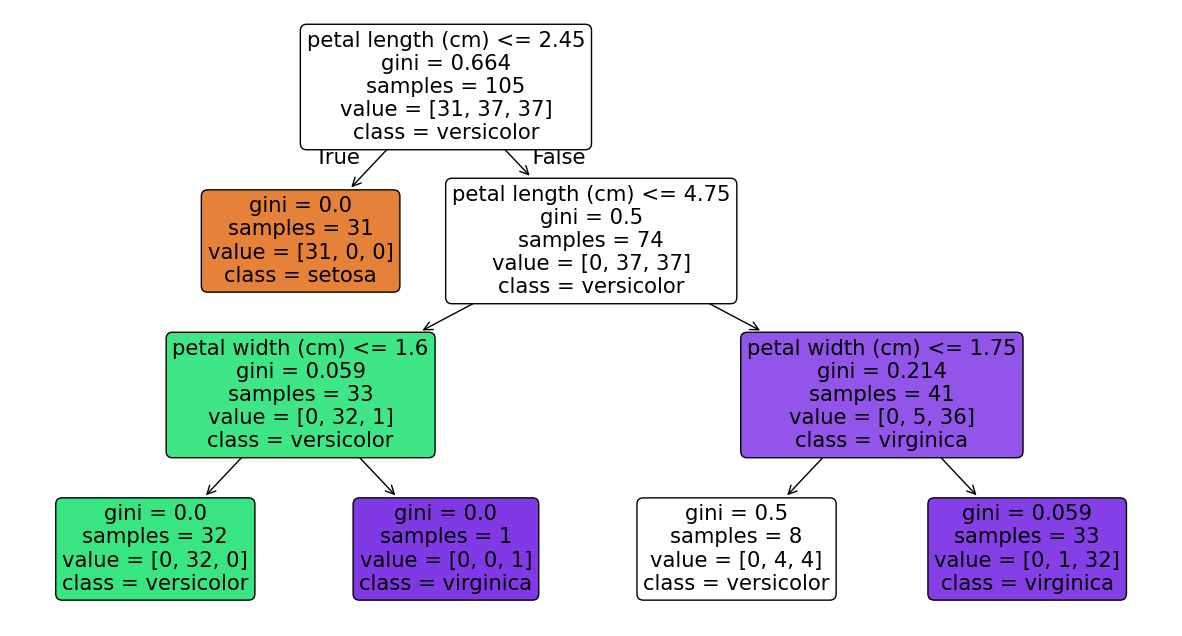

In [7]:
plt.figure(figsize=(15,8))
plot_tree(
    clf,
    filled=True,
    feature_names=feature_names,
    class_names=target_names,
    rounded=True
)
plt.show()

###Step 7 - Feature Importance

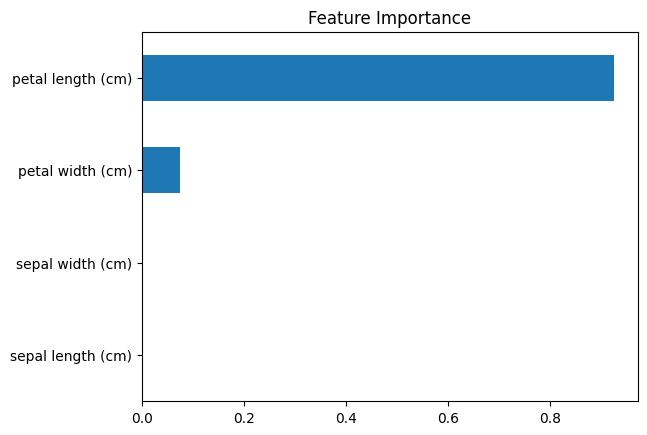

In [8]:
# How important each feature is for decision making
importances = pd.Series(clf.feature_importances_, index=feature_names)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()